<CENTER><h1>Estructura de bandas electrónicas para una red 3D para la estructura cristalina FCC</h1></CENTER>
<div align="right">Por:<br>Angie M. Sanchez<br>Jorge A. Quintero<br>Kevin A. González<br>2019</div>

<br style="clear:both;" />
<div id="imagenes" align="center">
<img src="https://raw.githubusercontent.com/davidalejandromiranda/estadoSolido/master/S4_G4_EstructuraBandasFCC/Assets/3DFCC.png" style="width:35%" />
<h3>Primera zona de Brillouin de una red FCC</h3>
<a href="https://youtu.be/4O8R89EQ-Sw" target="_blank"><b>Video explicativo</b></a>
</div>

In [1]:
#Importar librerías y definir algunas variables, vectores primitivos y puntos
#estrella (de alta simetría)

import numpy as np               
import matplotlib.pyplot as plt
from scipy import constants as cte
a = 1
pi = np.pi
b  = 2*pi/a



#escribimos los vectores en el espacio recìproco
b1 = np.r_[-b, b, b]
b2 = np.r_[b, -b, b]
b3 = np.r_[b, b, -b]
#Escribimos los puntos estrella correspondientes
k_Gamma = np.r_[0  , 0  ,0]
k_K     = np.r_[3*b/4, 3*b/4, 0]
k_W     = np.r_[b, b/2, 0]       
k_X     = np.r_[b, 0  ,0] 
k_U     = np.r_[b, b/4, b/4]
k_L     = np.r_[b/2, b/2  ,b/2]

Se define la red recíproca $\vec{G}$, para todos los enteros $m_1$ y $m_2$,$m_3$ tales que dados los vectores primitivos de la red recíproca $\vec{b}_1$ y $\vec{b}_2$,$\vec{b}_3$, $$\vec{G} = m_1 \vec{b}_1 + m_2 \vec{b}_2 + m_3 \vec{b}_3 $$

Nótese que la energía $E_{\vec{k}}$ es invariante ante cualquier transformación de traslación dada por $\vec{G}$.

In [2]:
#Definios la constante de planck y la masa del electròn
hbar = cte.hbar/cte.e # eV s
m_e  = cte.m_e


#Energy:
#funciòn que recibe dos vectores k1 y k2, los coeficientes m1 y m2.
#La salida son dos arreglos: el primero con los nùmeros entre 0 y la norma del vector unitario.
#El segundo con los valores de la energìa para los valores de k(entre k1 y k2).

def energy(k1, k2, m1 = 0, m2 = 0, m3 = 0, number_of_k_points = 1000): 
    k_12 = k2 - k1 #restamos los vectores
    norm_k_12 = np.linalg.norm(k_12) # calcular la norma de la resta anterior
    uk_12 = k_12 / norm_k_12 #calcular el vector normal
    X = np.linspace(0, norm_k_12, number_of_k_points) #lista de nùmeros entre 0 y la norma de k1 y k2
    K = [ k1 + x*uk_12 + m1*b1 + m2*b2 + m3*b3 for x in X ] # calcula los k en el camino entre k1 y k2
    E = [ hbar**2 * np.dot(k,k) / (2*m_e) for k in K] #carlcula las energìas correspondientes
    return X, np.array(E)

# càlculo de la energìa de fermi
efermi = 8*(hbar**2)*b**2/(2*m_e*2*np.pi)


In [3]:
k_labels = ['$L$',r'$K$',r'$U$',r'$W$', r'$\Gamma$', r'$X$',r'$W$', r'$L$', r'$\Gamma$',r'$K$',r'$U$',r'$X$']

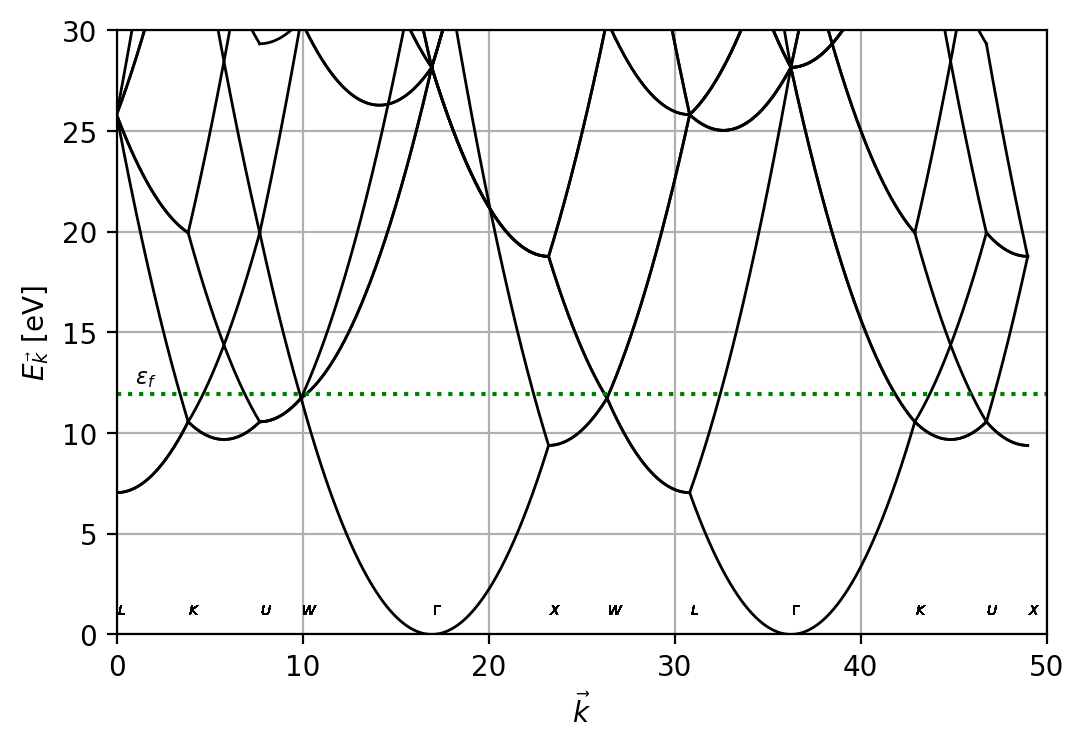

In [4]:
# Se definen las zonas de Brillouin, y los caminos que tomarán los 
#vectores al lo largo de los puntos estrellas.
k_path = [k_L, k_K, k_U, k_W, k_Gamma, k_X, k_W, k_L, k_Gamma, k_K, k_U ,k_X]


plt.figure(dpi = 200)
BZ = { # valores de m1 y m2 para la BZ -> (m1, m2)
    1: ( 0,  0, 0),
    2: (-1,  0, 0),
    3: ( 0, -1, 0),
    4: (-1, -1, -1),
    5: ( 0,  0, -1),
    6: ( 1,  0, 0),
    7: ( 0,  1, 0),
    8: ( 0,  0, 1),
    9: ( 1,  1, 1),
    10:(-1,  1, 0),
    11:( 1, -1, 0),
    12:( 0, -1, 1),
    13:( 0,  1, -1),
    14:(-1,  0,  1),
    15:( 1,  0, -1),
    16:( 1,   1, 0),
    17:( 0,   1, 1),
    18:( 1,  0, 1),
    19:( -1,  0, -1),
    20:( -1,  -1, 0),
    21:(0,  -1, -1),
    22:( 1, -1, -1),
    23:(-1, -1, 1),
    24:( -1,  1, -1),
    25:( -1,  1, 1),
    26:( 1,  1, -1),
    27:( 1, -1, 1)}

#Calculo de las energìas de las bandas para cada camino de las zonas de Brillouin
for zone in range(1, 28):
    #recibimos cada coeficientes
    m1 = BZ[zone][0]
    m2 = BZ[zone][1]
    m3 = BZ[zone][2]
    Dk = 0
    #Calculamos la energìa teniendo en cuenta el cambio del vector k dependiendo de cada zona
    for i in range(len(k_path)-1):
        k, E = energy(k_path[i], k_path[i+1], m1 = m1, m2 = m2, m3 = m3)
        k += Dk
        plt.plot(k, E, 'k', lw = 1)#graficamos la energìa
        Dk = k.max()
        if i < len(k_labels):
            plt.text(k.min(), 1, k_labels[i],fontsize=5) #graficamos los nombres de los puntos estrella
            plt.text(k.max(), 1, k_labels[i+1],fontsize=5)        
            
#arregamos los nombres a los ejes y la barra para indicar la energìa de fermi
plt.axhline(efermi, color='g',ls="dotted")
texto1 = plt.text(1, efermi+0.5, r'$\epsilon_f$', fontsize=8)
plt.ylim(0, 30)
plt.xlim(0, 50)
plt.xlabel(r'$\vec{k}$')
plt.ylabel(r'$E_{\vec{k}}$ [eV]')
plt.grid()

End!